# 1-1 category별로 여러 편의시설 설치된 곳을 찾기

In [154]:
import pandas as pd

In [155]:
import pdvega

In [156]:
import matplotlib.pyplot as plt

In [157]:
%matplotlib notebook

In [158]:
%matplotlib inline

In [159]:
from matplotlib import font_manager, rc
path = 'c:/windows/fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [160]:
test = pd.read_csv('table_dataclean.csv')

In [161]:
graph1 = test.groupby('category').facility_available_name.count()

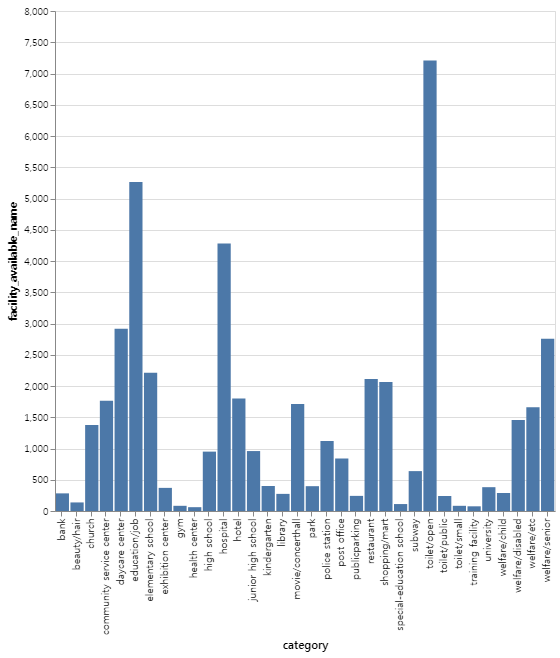

In [162]:
graph1.vgplot.bar(width = 500, height=500,interactive=False)

# category별로 편의시설 유형 파악

In [163]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [164]:
test.category.unique()

array(['subway', 'movie/concerthall', 'shopping/mart', 'publicparking',
       'toilet/public', 'hospital', 'community service center',
       'police station', 'post office', 'health center', 'bank', 'hotel',
       'daycare center', 'education/job', 'elementary school',
       'high school', 'junior high school', 'kindergarten', 'university',
       'special-education school', 'library', 'beauty/hair', 'church',
       'gym', 'training facility', 'park', 'welfare/senior', 'restaurant',
       'exhibition center', 'welfare/etc', 'welfare/disabled',
       'welfare/child', 'toilet/open', 'toilet/small'], dtype=object)

In [165]:
len(test.category.unique())

34

In [166]:
test[test.category=='subway'].groupby('facility_available_name').facility_id.count()

facility_available_name
계단핸드레일      2
수평보행기       3
에스켈레이터    132
엘리베이터     211
화장실       213
휠체어리프트     77
Name: facility_id, dtype: int64

In [167]:
graph2 = []
for result in test.category.unique():
    graph2.append(test[test.category ==  result].groupby('facility_available_name').facility_id.count())
    

subway


movie/concerthall


shopping/mart


publicparking


toilet/public


hospital


community service center


police station


post office


health center


bank


hotel


daycare center


education/job


elementary school


high school


junior high school


kindergarten


university


special-education school


library


beauty/hair


church


gym


training facility


park


welfare/senior


restaurant


exhibition center


welfare/etc


welfare/disabled


welfare/child


toilet/open


toilet/small


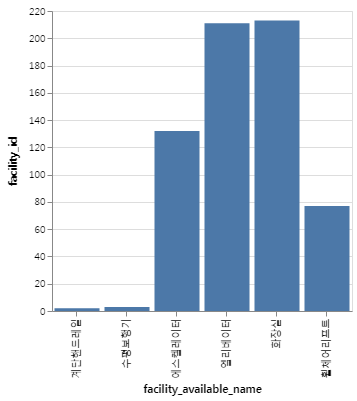

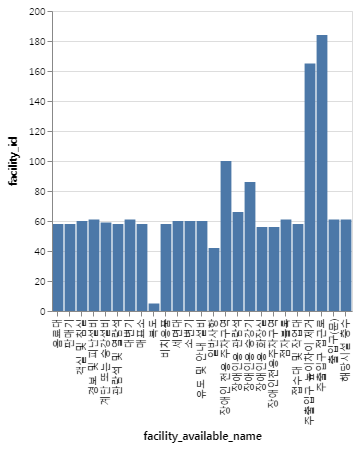

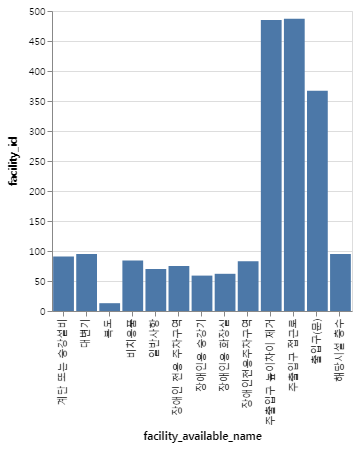

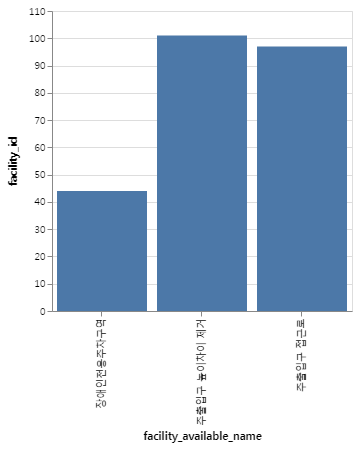

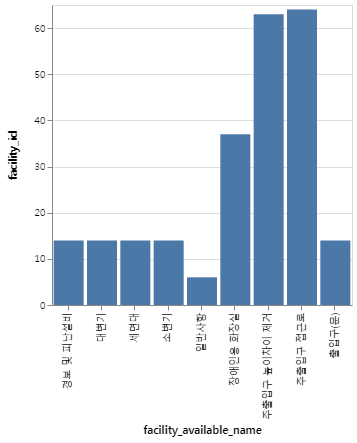

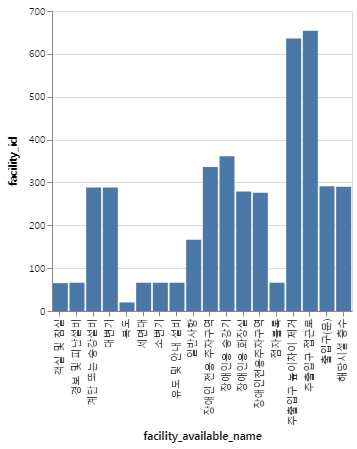

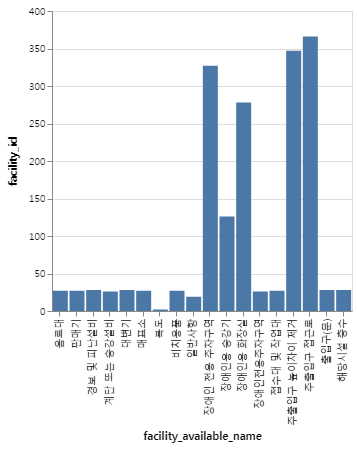

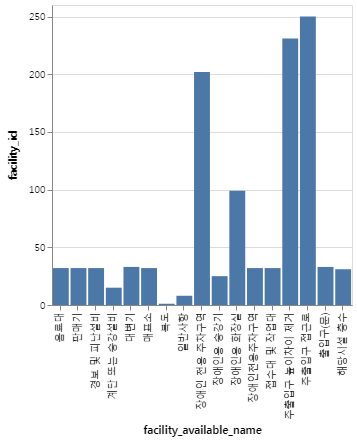

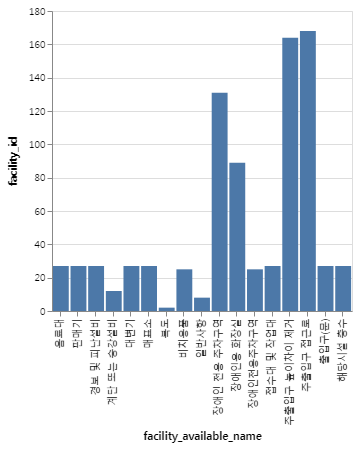

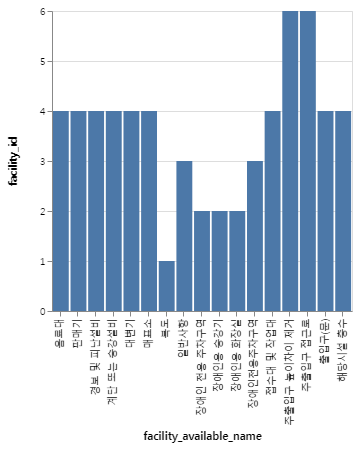

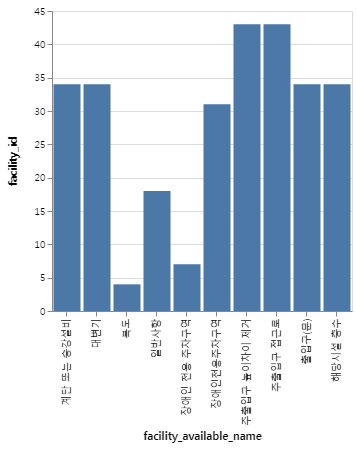

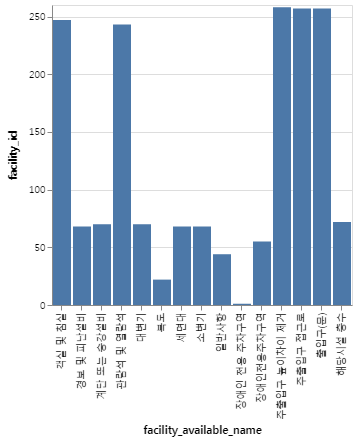

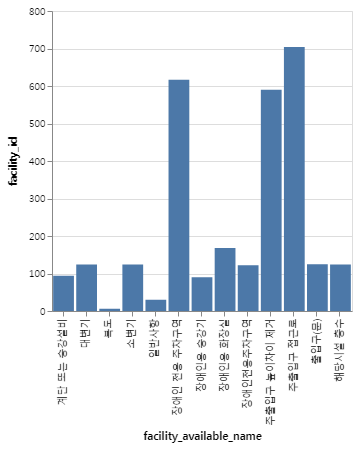

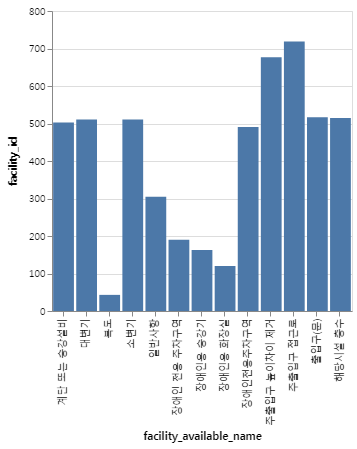

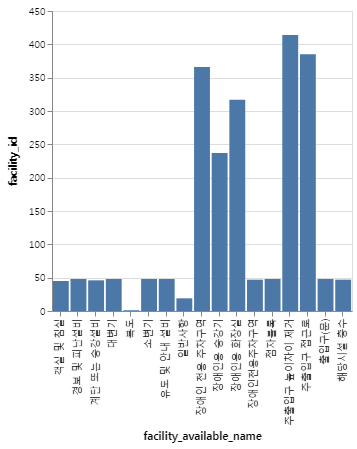

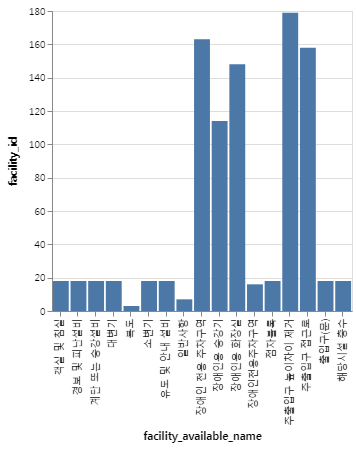

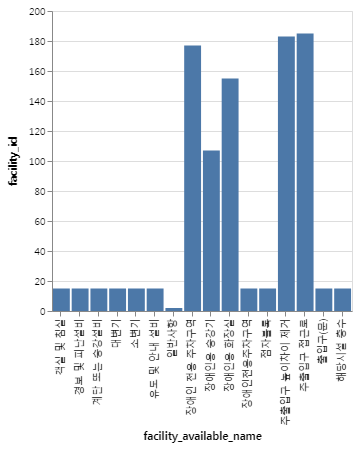

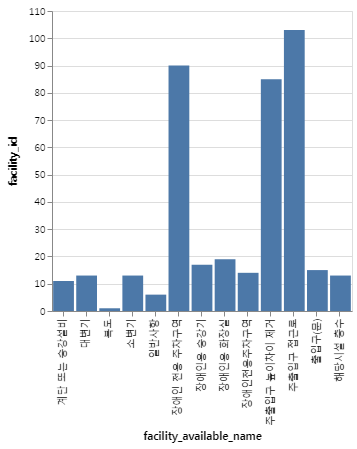

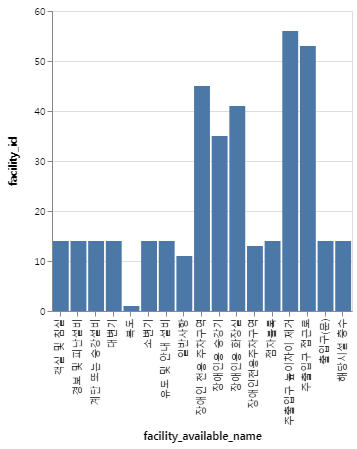

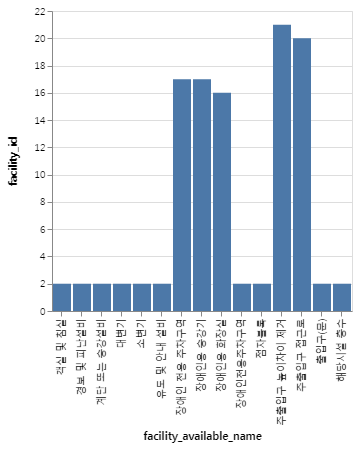

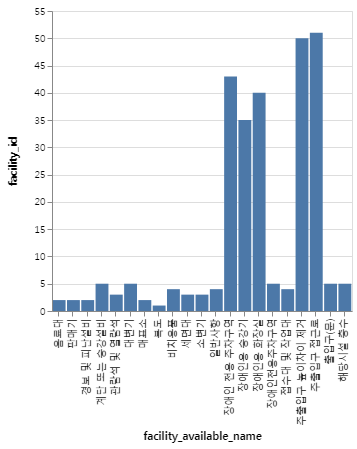

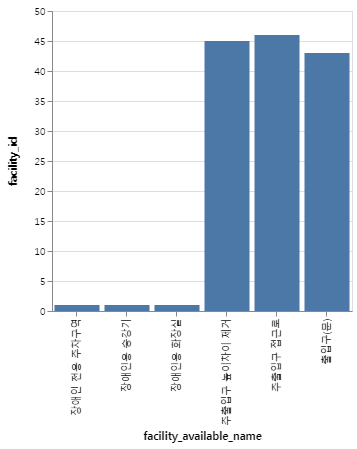

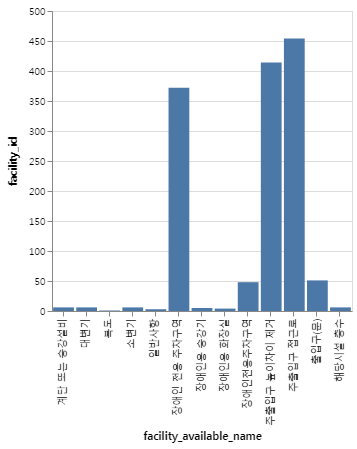

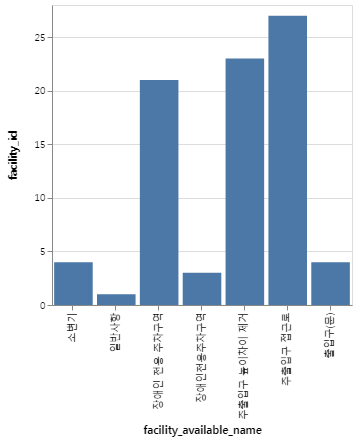

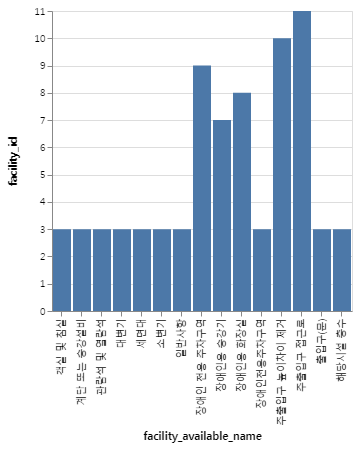

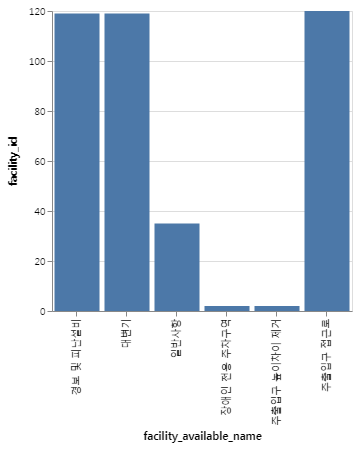

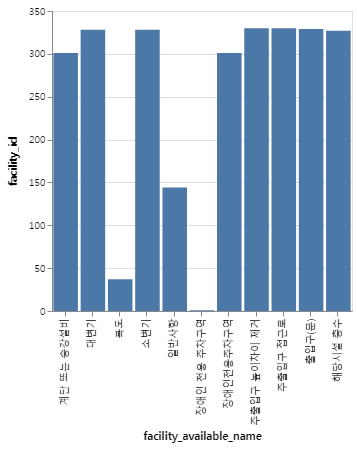

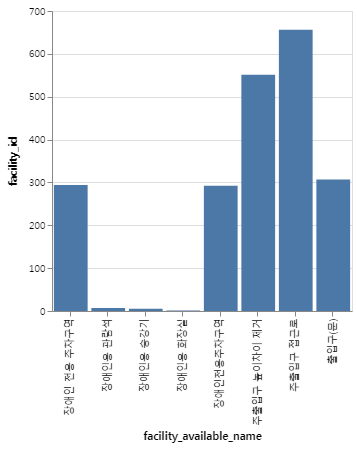

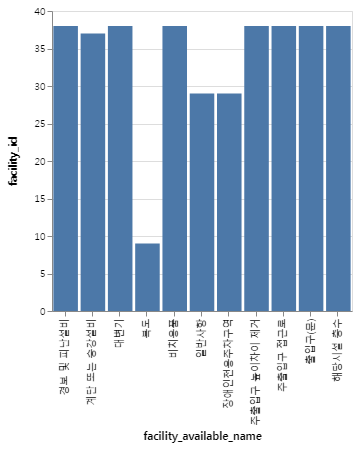

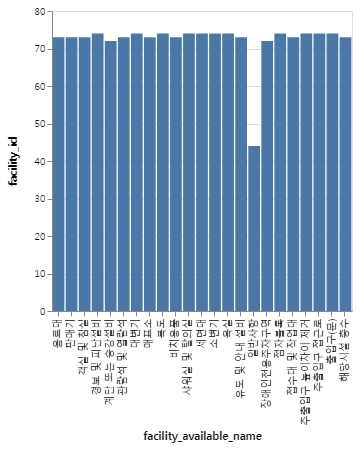

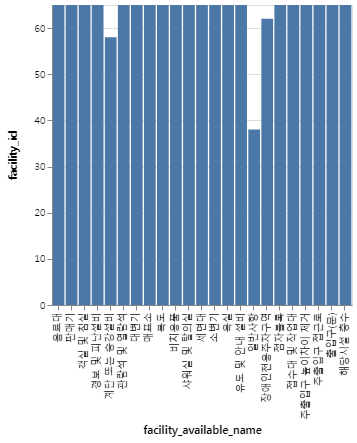

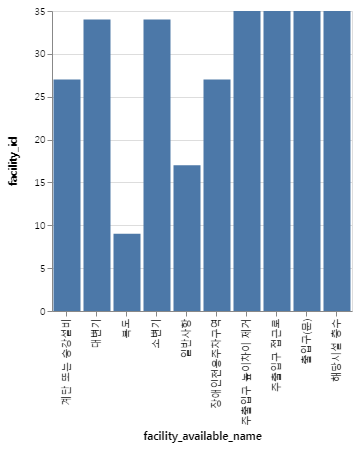

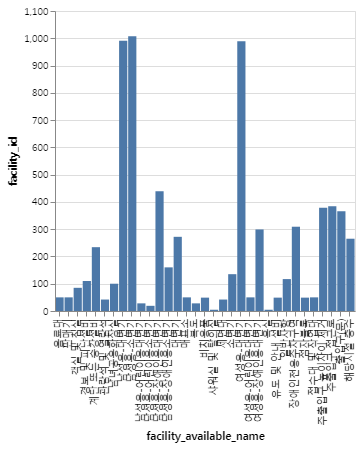

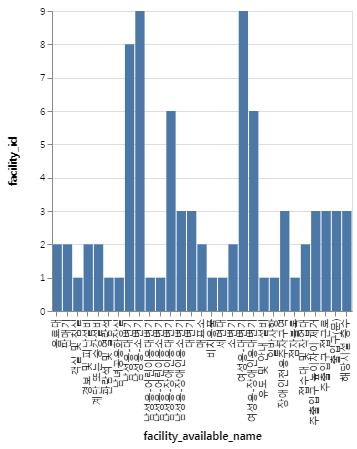

In [168]:
for i, result in enumerate(test.category.unique()):
    print(result)
    graph2[i].vgplot.bar( width = 300, height=300,interactive = False)

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46517 entries, 0 to 46516
Data columns (total 10 columns):
Unnamed: 0                 46517 non-null int64
category                   46517 non-null object
lat                        46517 non-null float64
lon                        46517 non-null float64
place_address              45879 non-null object
place_id                   46517 non-null int64
place_name                 46517 non-null object
facility_available_name    46517 non-null object
facility_is_available      15024 non-null object
facility_id                46517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [192]:
test.place_address.isna().sum()

638

In [193]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46517 entries, 0 to 46516
Data columns (total 10 columns):
Unnamed: 0                 46517 non-null int64
category                   46517 non-null object
lat                        46517 non-null float64
lon                        46517 non-null float64
place_address              45879 non-null object
place_id                   46517 non-null int64
place_name                 46517 non-null object
facility_available_name    46517 non-null object
facility_is_available      15024 non-null object
facility_id                46517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [220]:
ttest = test.copy()

In [221]:
ttest.place_address.isna().sum()

638

In [222]:
ttest.place_id.isna().sum()

0

In [223]:
ttest.isna().any()

Unnamed: 0                 False
category                   False
lat                        False
lon                        False
place_address               True
place_id                   False
place_name                 False
facility_available_name    False
facility_is_available       True
facility_id                False
dtype: bool

In [224]:
ttest.isna().sum()

Unnamed: 0                     0
category                       0
lat                            0
lon                            0
place_address                638
place_id                       0
place_name                     0
facility_available_name        0
facility_is_available      31493
facility_id                    0
dtype: int64

In [225]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46517 entries, 0 to 46516
Data columns (total 10 columns):
Unnamed: 0                 46517 non-null int64
category                   46517 non-null object
lat                        46517 non-null float64
lon                        46517 non-null float64
place_address              45879 non-null object
place_id                   46517 non-null int64
place_name                 46517 non-null object
facility_available_name    46517 non-null object
facility_is_available      15024 non-null object
facility_id                46517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [226]:
import numpy as np

In [227]:
ttest[ttest.place_address.isna()].category.count()

638

In [230]:
ttest.dropna(inplace=True,subset={'place_address'})

In [231]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45879 entries, 638 to 46516
Data columns (total 10 columns):
Unnamed: 0                 45879 non-null int64
category                   45879 non-null object
lat                        45879 non-null float64
lon                        45879 non-null float64
place_address              45879 non-null object
place_id                   45879 non-null int64
place_name                 45879 non-null object
facility_available_name    45879 non-null object
facility_is_available      14386 non-null object
facility_id                45879 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [232]:
ttest.isna().sum()

Unnamed: 0                     0
category                       0
lat                            0
lon                            0
place_address                  0
place_id                       0
place_name                     0
facility_available_name        0
facility_is_available      31493
facility_id                    0
dtype: int64

In [ ]:
## 어드레스없는거는 모드 드롭함.

In [233]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004


In [262]:
ttest.place_address.str.contains('구').sum()

45859

In [263]:
ttest.iloc[45005]

Unnamed: 0                                45643
category                            toilet/open
lat                                     37.5329
lon                                     127.145
place_address                      서울특별시 둔촌동 산6
place_id                                  30872
place_name                 일자산자연공원(둔촌약수터입구) 화장실
facility_available_name                 여성용-대변기
facility_is_available                       NaN
facility_id                              303305
Gu                                             
Name: 45643, dtype: object

In [264]:
ttest.loc[45005, ['place_address'] ] = '서울특별시 강동구 둔촌동 산6'

In [265]:
ttest.loc[45005, ['place_address'] ]

place_address    서울특별시 강동구 둔촌동 산6
Name: 45005, dtype: object

In [252]:
# ttest.iloc[45005]['place_address'] = '서울특별시 강동구 둔촌동 산6'

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [267]:
ttest.loc[45005, ['place_address'] ]

place_address    서울특별시 강동구 둔촌동 산6
Name: 45005, dtype: object

In [247]:
for i,v in enumerate(ttest.place_address.str.split(' ')):
    if not v[1].endswith('구'):
        print(i,v)

45005 ['서울특별시', '둔촌동', '산6']
45006 ['서울특별시', '둔촌동', '산6']
45007 ['서울특별시', '둔촌동', '산6']
45008 ['서울특별시', '둔촌동', '산6']
45009 ['서울특별시', '둔촌동', '산94']
45010 ['서울특별시', '둔촌동', '산94']
45011 ['서울특별시', '둔촌동', '산94']
45205 ['서울특별시', '강일동', '675-3']
45206 ['서울특별시', '강일동', '675-3']
45207 ['서울특별시', '강일동', '675-3']
45208 ['서울특별시', '강일동', '675-3']
45209 ['서울특별시', '강일동', '675-3']
45210 ['서울특별시', '강일동', '675-3']
45211 ['서울특별시', '강일동', '675-3']
45212 ['서울특별시', '강일동', '675-3']
45213 ['서울특별시', '강일동', '675-7']
45214 ['서울특별시', '강일동', '675-7']
45215 ['서울특별시', '강일동', '675-7']
45216 ['서울특별시', '강일동', '675-7']
45217 ['서울특별시', '강일동', '675-7']


In [243]:
ttest['Gu']=''

In [244]:
ttest[ttest.place_address.str.contains('구')==False]['Gu']='강동구'

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004


In [191]:
ff.place_address.str.split(' ').head()

638       [서울특별시, 종로구, 동숭동, 1-37]
639       [서울특별시, 종로구, 동숭동, 1-37]
640    [서울특별시, 강남구, 신사동, , 568-2]
641    [서울특별시, 강남구, 신사동, , 568-2]
642    [서울특별시, 강남구, 신사동, , 568-2]
Name: place_address, dtype: object

In [190]:
for i,v in enumerate(ff.place_address.str.split(' ')):
    if not v[1].endswith('구'):
        print(v)

['서울특별시', '둔촌동', '산6']
['서울특별시', '둔촌동', '산6']
['서울특별시', '둔촌동', '산6']
['서울특별시', '둔촌동', '산6']
['서울특별시', '둔촌동', '산94']
['서울특별시', '둔촌동', '산94']
['서울특별시', '둔촌동', '산94']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-3']
['서울특별시', '강일동', '675-7']
['서울특별시', '강일동', '675-7']
['서울특별시', '강일동', '675-7']
['서울특별시', '강일동', '675-7']
['서울특별시', '강일동', '675-7']


In [ ]:
# 결국 강동구가 문제였음.
# 없는놈들은 구에 강동구를 넣기로함.

In [134]:
ff.iloc[54403:54415]

,place_address
60182,서울특별시 강일동 675-3
60183,서울특별시 강일동 675-3
60184,서울특별시 강일동 675-3
60185,서울특별시 강일동 675-3
60186,서울특별시 강일동 675-3
60187,서울특별시 강일동 675-3
60188,서울특별시 강일동 675-3
60189,서울특별시 강일동 675-3
60190,서울특별시 강일동 675-7
60191,서울특별시 강일동 675-7


In [145]:
ttest[ttest['place_id'].isna()==True]

,Unnamed: 0,index,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
16176,16176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16177,16177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16178,16178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16179,16179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16180,16180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16181,16181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16182,16182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16183,16183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16184,16184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16185,16185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
ttest[ttest['place_id'].isna()]

,Unnamed: 0,index,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
16176,16176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16177,16177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16178,16178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16179,16179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16180,16180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16181,16181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16182,16182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16183,16183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16184,16184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16185,16185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
ttest[ttest.place_id==np.nan]

,Unnamed: 0,index,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id


In [117]:
ttest.place_address.isna().sum()

0

In [109]:
ff = ttest[ttest['place_address'].isna()]

SyntaxError: invalid syntax (<ipython-input-109-8355ee7f3f9c>, line 1)

In [135]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60856 entries, 0 to 60855
Data columns (total 11 columns):
Unnamed: 0                 60856 non-null int64
index                      55715 non-null float64
category                   55715 non-null object
lat                        55715 non-null float64
lon                        55715 non-null float64
place_address              55077 non-null object
place_id                   55715 non-null float64
place_name                 55715 non-null object
facility_available_name    55715 non-null object
facility_is_available      16151 non-null object
facility_id                55715 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 5.1+ MB


In [82]:
ttest.place_address = ff

In [83]:
ttest.head()

,Unnamed: 0,index,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
0,0,0.0,subway,37.492317,127.118104,NaN,0.0,가락시장,화장실,이용가능,900000.0
1,1,1.0,subway,37.492317,127.118104,NaN,0.0,가락시장,엘리베이터,이용가능,900001.0
2,2,2.0,subway,37.492317,127.118104,NaN,0.0,가락시장,휠체어리프트,이용가능,900002.0
3,3,3.0,subway,37.480890,126.882574,NaN,1.0,가산디지털단지,에스켈레이터,이용가능,900003.0
4,4,4.0,subway,37.480890,126.882574,NaN,1.0,가산디지털단지,화장실,이용가능,900004.0


In [73]:
ttest.place_address.dropna(inplace=True)

In [74]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60856 entries, 0 to 60855
Data columns (total 11 columns):
Unnamed: 0                 60856 non-null int64
index                      55715 non-null float64
category                   55715 non-null object
lat                        55715 non-null float64
lon                        55715 non-null float64
place_address              55077 non-null object
place_id                   55715 non-null float64
place_name                 55715 non-null object
facility_available_name    55715 non-null object
facility_is_available      16151 non-null object
facility_id                55715 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 5.1+ MB


In [77]:
ttest.place_address.isna().sum()

0

In [33]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=graph2[0])

p = figure( plot_height=350, toolbar_location=None, title="Fruit Counts")
# p.vbar(x='fruits', top='counts', width=0.9, source=graph2[0], legend="fruits",
#        line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

ValueError: expected a dict or pandas.DataFrame, got facility_available_name
계단핸드레일      2
수평보행기       3
에스켈레이터    132
엘리베이터     211
화장실       213
휠체어리프트     77
Name: facility_id, dtype: int64

In [74]:
source

ColumnDataSource(id='4410a533-4c00-4eed-9031-260f144e095f', ...)